In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
newfont = {"fontname": "serif"}

ModuleNotFoundError: No module named 'numpy'

In [2]:
with open("catalogue_F356W.pickle", "rb") as handle:
    catalogue = pkl.load(handle)

In [3]:
with open("table_matched_catalogue_f444w.pickle", "rb") as handle:
    test = pkl.load(handle)

In [4]:
lists = catalogue.keys()
MAG770 = []
MAG1000 = []
MAG1500 =[]
MAG770e = []
MAG1000e = []
MAG1500e =[]
MAG444 = []
MAG444e = []
for i in lists:
    MAG770.append(float(catalogue[i]["f770w"]["MAG_APER"]))
    MAG444.append(float(catalogue[i]["f444w"]["MAG_APER"]))
    MAG1000.append(float(catalogue[i]["f1000w"]["MAG_APER"]))
    MAG1500.append(float(catalogue[i]["f1500w"]["MAG_APER"]))
    MAG770e.append(float(catalogue[i]["f770w"]["MAGERR_APER"]))
    MAG1000e.append(float(catalogue[i]["f1000w"]["MAGERR_APER"]))
    MAG1500e.append(float(catalogue[i]["f1500w"]["MAGERR_APER"]))
    MAG444e.append(float(catalogue[i]["f444w"]["MAGERR_APER"]))

M6 = np.asarray(MAG444)-np.asarray(MAG770)
M3 = np.asarray(MAG770)-np.asarray(MAG1000)

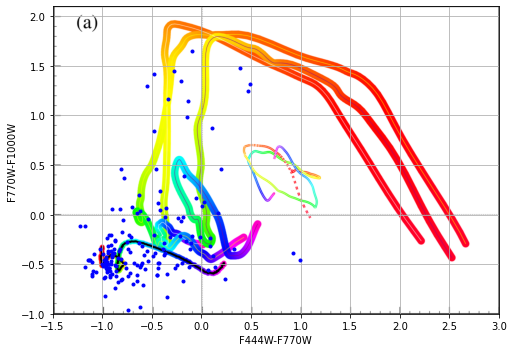

In [5]:
erm = plt.imread("Danial paper 444 QUALITY.png")
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])
plt.plot(M6, M3, ".", color="b", label = "data")
#plt.errorbar(M6, M3, yerr=uncerty, xerr=uncertx, linestyle = "", color="r", label = "error")
plt.xlabel("F444W-F770W")
plt.ylabel("F770W-F1000W")
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.grid()
plt.savefig("test galaxy color measure")

In [6]:
redshift = np.genfromtxt("photz.zout", skip_header=2, delimiter=None)
redshiftt = np.transpose(redshift)
red = redshiftt[17]
print(red)

[0.9324 0.8073 0.01   0.078  0.01   0.1928 0.01   3.0029 0.8236 0.8014
 0.01   0.01   0.0749 0.3423 0.8249 0.8012 0.01   0.01   0.5323 0.736
 1.7363 0.2241 0.8006 2.1479 0.8008 0.3358 0.01   0.1477 0.3162 0.5373
 0.2597 0.3194 0.2834 0.01   0.8014 2.4223 0.2908 0.1705 0.2412 0.01
 2.7572 0.8017 0.8298 1.2468 0.2546 0.01   0.239  0.8549 0.1077 0.01
 0.8155 0.883  0.5898 0.2581 0.296  0.8089 3.0823 0.8523 0.8019 3.0927
 0.4465 0.01   0.8123 0.01   0.3922 0.8716 0.0507 0.812  0.2131 0.01
 0.7076 0.786  0.1203 0.8299 0.9728 0.8777 0.8019 0.1953 0.086  0.2676
 0.8017 0.01   0.8009 0.8719 0.8017 0.1878 0.5258 0.1027 0.2182 0.5227
 0.2618 0.01   0.04   0.2337 0.0403 0.0633 0.8825 0.5271 0.0493 0.8167
 0.2759 0.1999 0.1091 0.2983 0.0543 0.4658 0.2819 0.5321 0.5294 0.8585
 0.7066 0.7652 0.8453 0.8032 0.2342 0.8047 0.1703 0.0751 0.5194 0.3194
 0.3245 0.3261 0.2708 0.8364 0.8012 0.326  0.01   0.8013 0.2798 0.01
 1.0155 0.9323 0.1987 0.5339 0.3004 0.9605 0.066  0.6026 0.8015 0.86
 0.01   0.8735 0.

In [7]:
max(red)

3.1803

In [8]:
rrr = 0
for i in catalogue.keys():
    catalogue[i]["photo-z"] = red[rrr]
    rrr += 1

In [9]:
newred = []
M6new = []
M3new = []
uncertynew = []
uncertxnew = []
for i in range(len(M6)):
    if M6[i] > 0.3 or M3[i] > -0.2:
        M6new.append(M6[i])
        M3new.append(M3[i])
        #uncertynew.append(uncerty[i])
        #uncertxnew.append(uncertx[i])
        newred.append(red[i])

In [10]:
sm = cm.colormaps["gist_rainbow"]

Text(0, 0.5, 'F770W-F1000W')

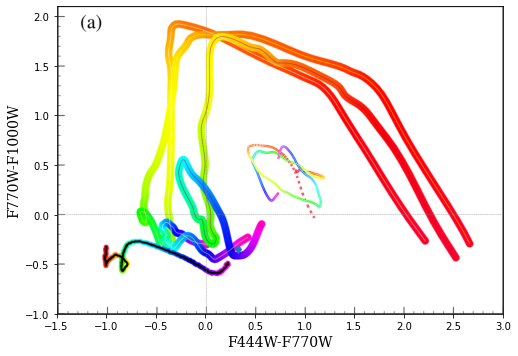

In [25]:
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])
#ww = plt.scatter(M6new, M3new, marker="o", c=newred, vmin=0.1, vmax=3.1, cmap=sm, edgecolors="k")
plt.plot(M6new[20], M3new[20], marker="d")
#plt.colorbar(ww, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
#plt.xlim(-1.5, 3)
#plt.ylim(-1, 2.1)

In [23]:
print(M6new[20], M3new[20])



0.3295999999999992 -0.3503000000000007


[0.994 1.    1.    1.    1.    0.962 1.    1.    1.    1.    1.    1.
 0.855 0.996 1.    1.    1.    1.    1.    0.818 0.679 0.994 1.    0.99
 0.783 0.986 1.    0.994 0.993 1.    0.997 0.998 0.979 1.    1.    0.858
 0.999 0.939 0.993 1.    1.    1.    1.   ] [0.933 0.807 0.012 0.078 0.012 0.193 0.012 3.004 0.824 0.798 0.012 0.012
 0.141 0.342 0.825 0.801 0.012 0.012 0.532 0.737 1.74  0.224 0.801 2.139
 0.636 0.336 0.012 0.148 0.316 0.537 0.26  0.319 0.283 0.012 0.801 2.527
 0.291 0.171 0.241 0.012 2.757 0.802 0.83 ]


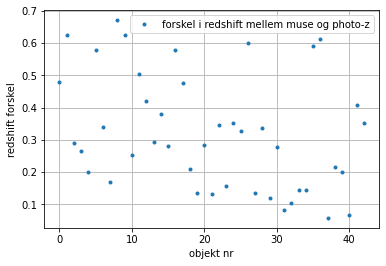

In [55]:
museshift = []
musecompare = []
u68 = np.array([])
l68 = np.array([])
index = 0
for i in catalogue.keys():
    if "MUSE_data" in catalogue[i].keys():
        museshift.append(catalogue[i]["MUSE_data"]["z_muse"])
        musecompare.append(catalogue[i]["photo-z"])
        u68 = np.append(u68, redshiftt[8][index])
        l68 = np.append(l68, redshiftt[7][index])
        index += 1
print(u68, l68)
amused = abs(np.asarray(museshift)-np.asarray(musecompare))
#plt.plot(museshift, ".", label = "spectro")
#plt.plot(musecompare, ".", label = "photo")
plt.plot(amused, ".", label = "forskel i redshift mellem muse og photo-z")
plt.xlabel("objekt nr")
plt.ylabel("redshift forskel")
plt.legend()
plt.grid()
plt.show()

In [27]:
print(museshift)

[0.3217, 1.4792, 0.397, 1.0815, 1.0823, 1.4503, 0.3888, 0.3836, 1.3782, 0.746, 1.0826, 1.3802, 0.3822, 0.3806, 0.4233, 0.5189, 1.4503, 0.3241, 0.398, 0.3896, 0.3869, 0.3911, 0.3849, 0.3915, 0.3914, 0.3905, 1.4817, 0.3909, 0.3865, 0.9366, 0.3872, 0.3847, 0.3864, 0.3865, 0.3848, 1.4503, 1.3782, 0.7469, 0.3844, 0.6002, 0.3932, 0.394, 1.163]


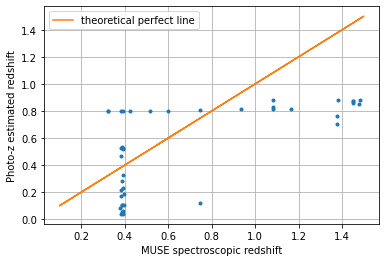

In [14]:
line = np.random.uniform(0.1, 1.5, (1000))
plt.plot(museshift, musecompare, ".")
plt.xlabel("MUSE spectroscopic redshift")
plt.ylabel("Photo-z estimated redshift")
plt.plot(line, line, label="theoretical perfect line")
plt.legend()
plt.grid()

In [15]:
something = 0
outfrac = 0
muse2 = []
phot2 = []
for i in range(len(museshift)):
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) > 0.15:
        something += 1
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) < 0.15:
        muse2.append(museshift[i])
        phot2.append(musecompare[i])
    outfrac = something/len(museshift)

0.4883720930232558


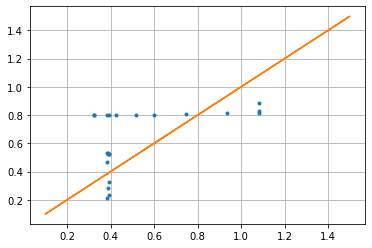

In [16]:
print(outfrac)
plt.plot(muse2, phot2, ".")
plt.plot(line, line)
plt.grid()

In [17]:
musered = []
muse444770 = []
muse7701000 = []
for i in catalogue.keys():
    if "MUSE_data" in catalogue[i].keys():
        musered.append(catalogue[i]["MUSE_data"]["z_muse"])
        muse444770.append(float(catalogue[i]["f444w"]["MAG_APER"])-float(catalogue[i]["f770w"]["MAG_APER"]))
        muse7701000.append(float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))

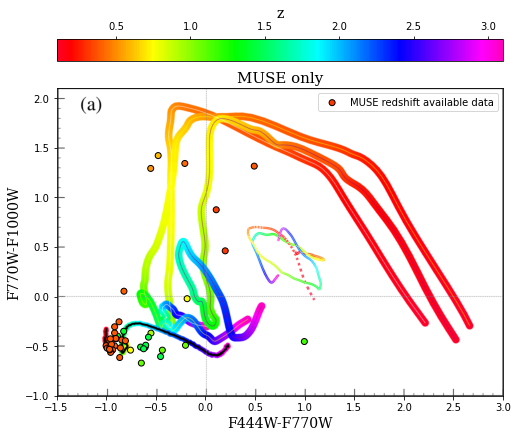

In [18]:
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])#, alpha=0.5)
www = plt.scatter(muse444770, muse7701000, c=musered, marker="o", edgecolor="k", vmin=0.1, vmax=3.1, cmap=sm, label = "MUSE redshift available data")
plt.colorbar(www, orientation="horizontal", location="top").set_label(label="z", **newfont, fontsize=14)
plt.title("MUSE only", **newfont, fontsize=15)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend()

In [30]:
catalogue[2]["photo-z"]

0.9324

<ErrorbarContainer object of 3 artists>

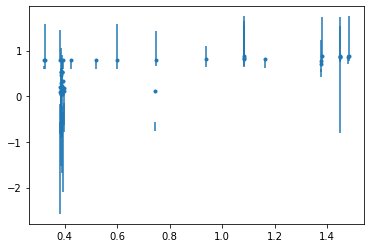

In [57]:
upper_limit = u68 - np.asarray(musecompare)
lower_limit = np.asarray(musecompare) - l68
#plt.plot(museshift, musecompare, ".")
plt.errorbar(museshift, musecompare, yerr=[upper_limit, lower_limit], fmt=".")
#print(upper_limit, lower_limit)